In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment

df = pd.read_csv('/content/Iris (1).csv')

X = df.iloc[:, 1:5]
y_true = df["Species"]
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Kích thước dữ liệu
df.shape

# Xem 5 dòng đầu
df.head()

# Thông tin tổng quát
df.info()

# Danh sách cột
df.columns

#Thống kê mô tả
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


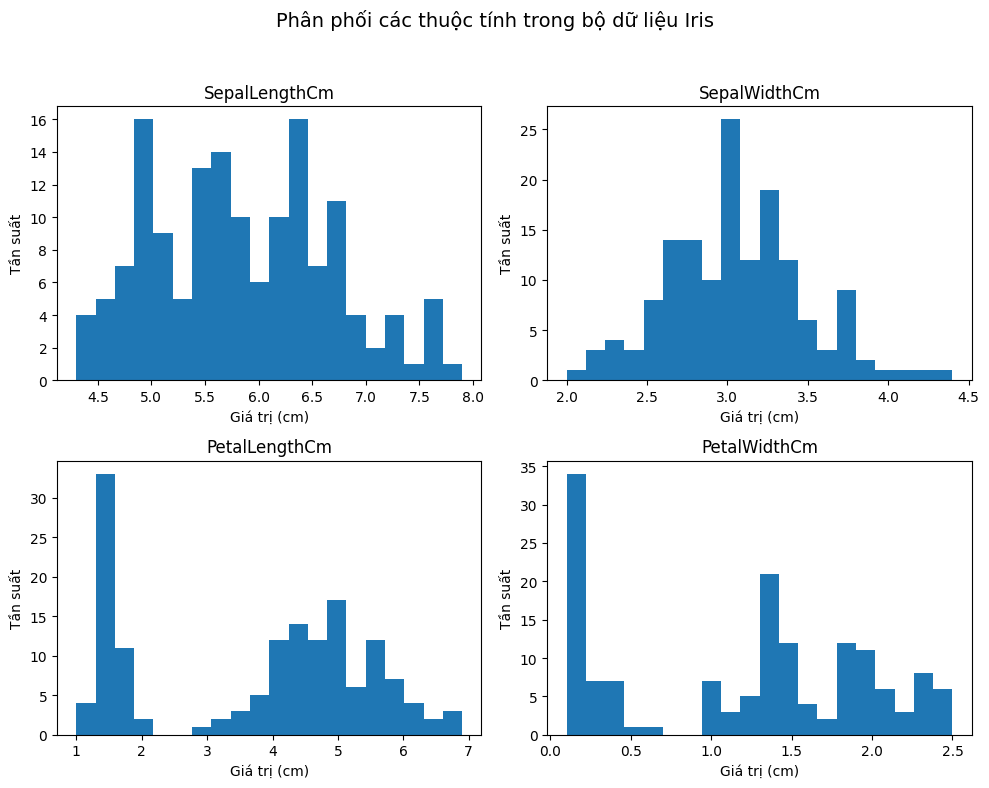

In [6]:
columns = df.columns[1:5]

plt.figure(figsize=(10,8))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel("Giá trị (cm)")
    plt.ylabel("Tần suất")

plt.suptitle("Phân phối các thuộc tính trong bộ dữ liệu Iris", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/tmp/ipython-input-1293915765.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


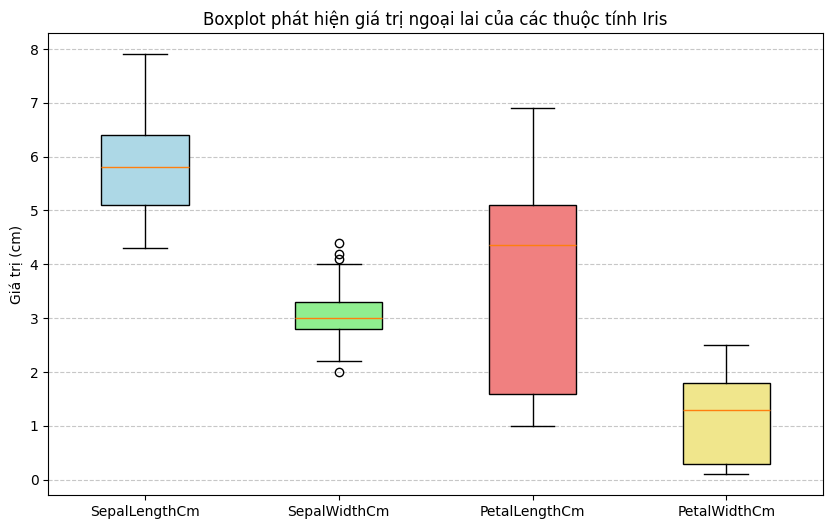

In [7]:
# Boxplot trước chuẩn hóa
plt.figure(figsize=(10,6))

box = plt.boxplot(
    df.iloc[:, 1:5],
    labels=df.columns[1:5],
    patch_artist=True,
    showfliers=True
)

# Tô màu nhẹ cho từng box
colors = ['lightblue', 'lightgreen', 'lightcoral', 'khaki']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Boxplot phát hiện giá trị ngoại lai của các thuộc tính Iris")
plt.ylabel("Giá trị (cm)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



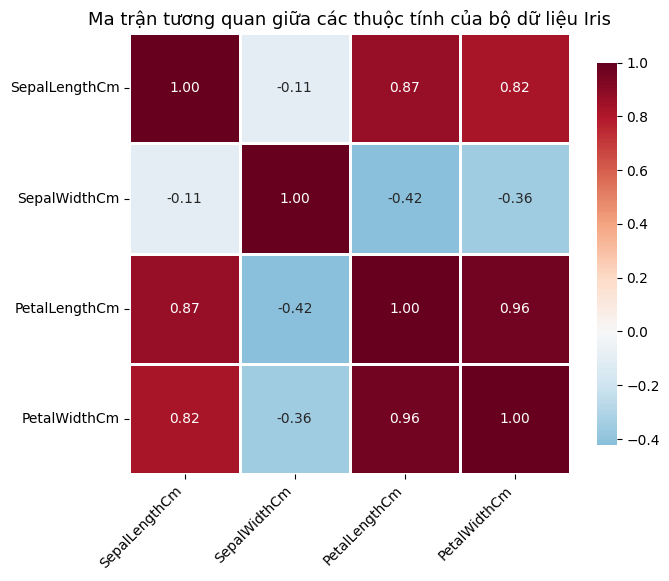

In [8]:
corr = df.iloc[:, 1:5].corr()

plt.figure(figsize=(7,6))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=0.8,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10}
)

plt.title("Ma trận tương quan giữa các thuộc tính của bộ dữ liệu Iris", fontsize=13)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, 1:5])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Tỷ lệ phương sai giải thích:", pca.explained_variance_ratio_)

Tỷ lệ phương sai giải thích: [0.72770452 0.23030523]


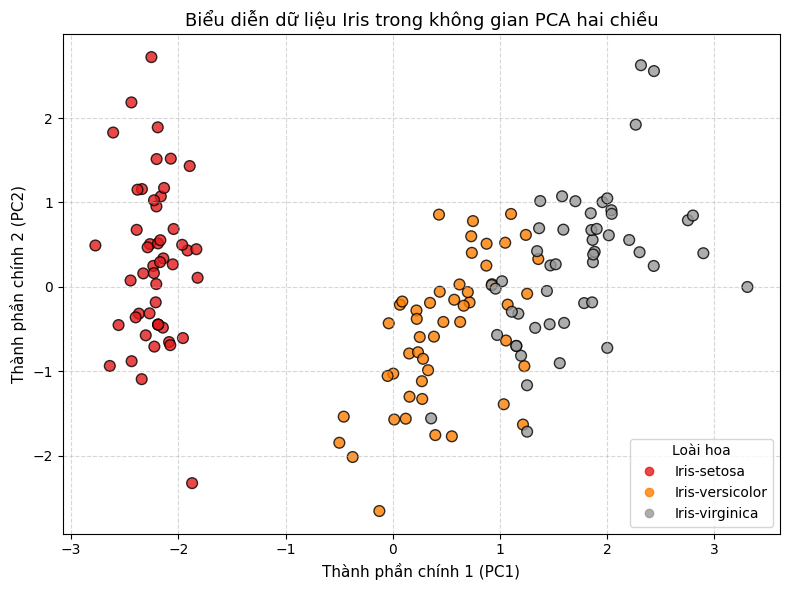

In [10]:
# Mã hóa nhãn loài
labels, species_names = pd.factorize(df["Species"])

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels,
    cmap="Set1",
    edgecolor="black",
    alpha=0.8,
    s=60
)

plt.xlabel("Thành phần chính 1 (PC1)", fontsize=11)
plt.ylabel("Thành phần chính 2 (PC2)", fontsize=11)
plt.title("Biểu diễn dữ liệu Iris trong không gian PCA hai chiều", fontsize=13)

# Tạo legend thủ công
handles = scatter.legend_elements()[0]
plt.legend(
    handles,
    species_names,
    title="Loài hoa",
    loc="best",
    frameon=True
)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Iris (1).csv')
X = df.iloc[:, 1:5]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

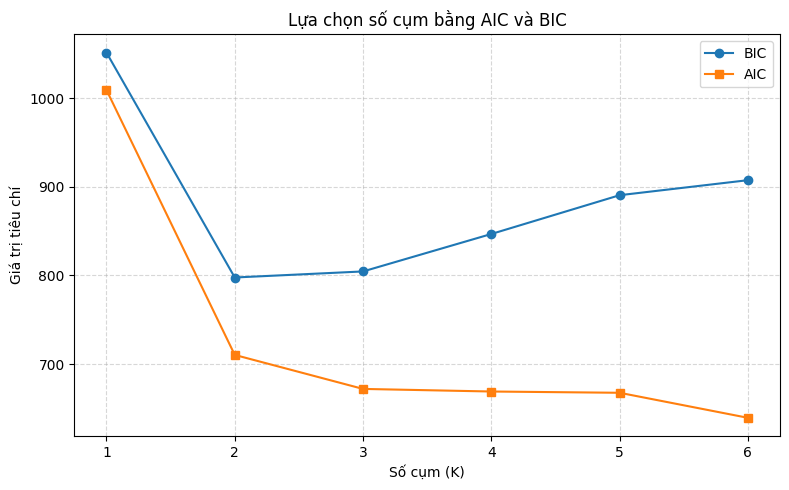

In [13]:
Ks = range(1, 7)
aics, bics = [], []

for k in Ks:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type="full",
        n_init=10,
        random_state=42
    )
    gmm.fit(X_scaled)
    aics.append(gmm.aic(X_scaled))
    bics.append(gmm.bic(X_scaled))

plt.figure(figsize=(8,5))
plt.plot(Ks, bics, marker='o', label="BIC")
plt.plot(Ks, aics, marker='s', label="AIC")
plt.xlabel("Số cụm (K)")
plt.ylabel("Giá trị tiêu chí")
plt.title("Lựa chọn số cụm bằng AIC và BIC")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [16]:
n_components = 3

results = []

covariance_types = ['spherical', 'tied', 'diag', 'full']

y_true_numeric = labels

print(f"Evaluating GMM with {n_components} components for different covariance types...")

for cov_type in covariance_types:
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type=cov_type,
        n_init=10,
        random_state=42
    )
    gmm.fit(X_scaled)
    y_pred = gmm.predict(X_scaled)

    ari = adjusted_rand_score(y_true_numeric, y_pred)
    nmi = normalized_mutual_info_score(y_true_numeric, y_pred)

    results.append([cov_type, ari, nmi, gmm.converged_])
    print(f"  - Covariance Type: {cov_type}, ARI: {ari:.4f}, NMI: {nmi:.4f}, Converged: {gmm.converged_}")

results_df = pd.DataFrame(
    results,
    columns=["Covariance type", "ARI", "NMI", "Converged"]
)

results_df

Evaluating GMM with 3 components for different covariance types...
  - Covariance Type: spherical, ARI: 0.6410, NMI: 0.6728, Converged: True
  - Covariance Type: tied, ARI: 0.9037, NMI: 0.8801, Converged: True
  - Covariance Type: diag, ARI: 0.8180, NMI: 0.8130, Converged: True
  - Covariance Type: full, ARI: 0.9039, NMI: 0.8997, Converged: True


,Covariance type,ARI,NMI,Converged
0,spherical,0.641006,0.672844,True
1,tied,0.903714,0.880111,True
2,diag,0.818006,0.813043,True
3,full,0.903874,0.899694,True


In [17]:
gmm = GaussianMixture(
    n_components=3,
    covariance_type="full",
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)

gmm.fit(X_scaled)

GaussianMixture(max_iter=300, n_components=3, n_init=10, random_state=42,
                tol=0.0001)

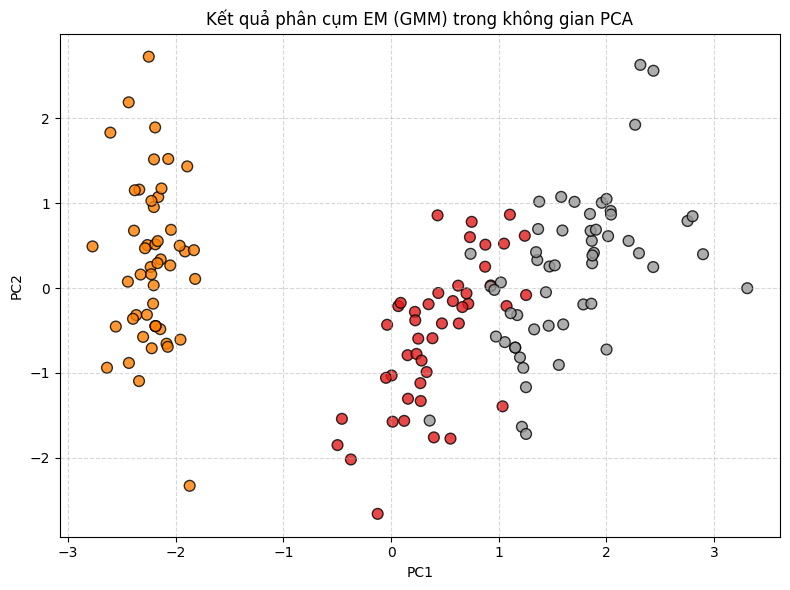

In [19]:
abels_em = gmm.predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=abels_em,
    cmap="Set1",
    edgecolor="black",
    alpha=0.8,
    s=60
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Kết quả phân cụm EM (GMM) trong không gian PCA")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

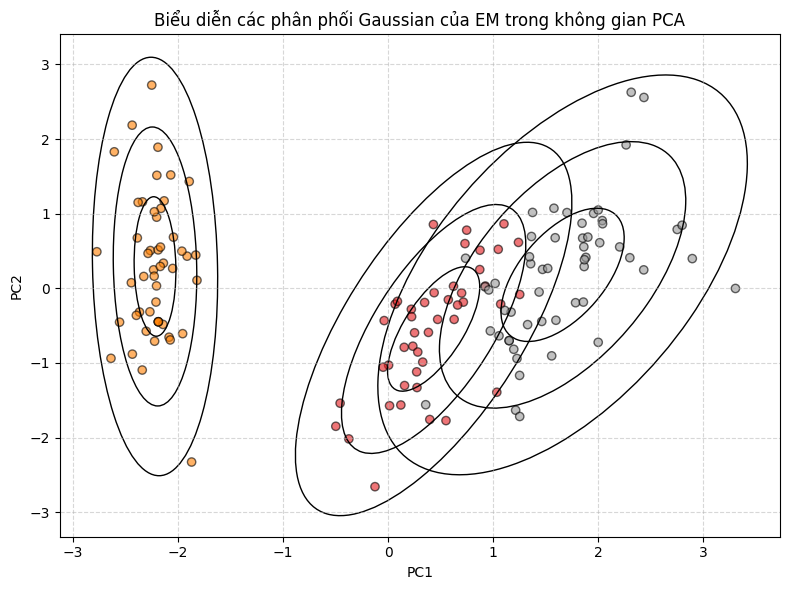

In [21]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    # Phân tích covariance
    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Vẽ ellipse với angle là keyword
    for nsig in range(1, 4):
        ellipse = Ellipse(
            xy=position,
            width=nsig * width,
            height=nsig * height,
            angle=angle,
            fill=False,
            **kwargs
        )
        ax.add_patch(ellipse)


plt.figure(figsize=(8,6))
ax = plt.gca()

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=abels_em,
    cmap="Set1",
    edgecolor="black",
    alpha=0.6
)

# Vẽ ellipsoid cho từng cụm
for mean, cov in zip(gmm.means_, gmm.covariances_):
    # Chiếu mean và covariance sang không gian PCA
    mean_pca = pca.transform(mean.reshape(1, -1))[0]
    cov_pca = pca.components_ @ cov @ pca.components_.T
    draw_ellipse(mean_pca, cov_pca, ax=ax, color='black')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biểu diễn các phân phối Gaussian của EM trong không gian PCA")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()